In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py
import sys
import os
import glob
import warnings
from pprint import pprint
import matplotlib.pyplot as plt

from tqdm import tqdm

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

basedir = '/project/vitelli/jonathan/REDO_fruitfly/'
sys.path.insert(0, os.path.join(basedir, 'release'))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 6

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 6/6 [00:00<00:00, 296.62it/s]


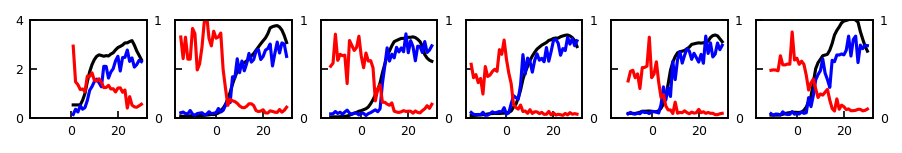

In [35]:
from mutant_datasets import *
from train_myosin_translation import MaskedVAE
from utils.plot_utils import *

model = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('../../tb_logs/May2024/MaskedVAE_sqh_beta=0.0001_split=embryo')
model.load_state_dict(info['state_dict'])
model.to(device)


dataset = WTDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1).mean(axis=(1,2)), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

100%|██████████| 6/6 [00:00<00:00, 19.56it/s]


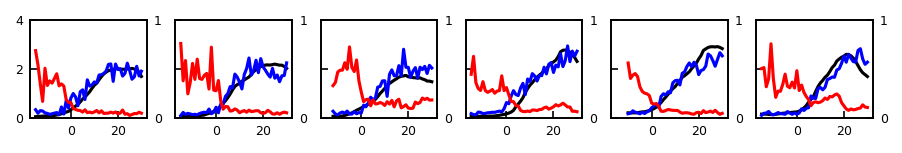

In [34]:
from mutant_datasets import *
from train_myosin_translation import MaskedVAE
from utils.plot_utils import *

model = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('../../tb_logs/May2024/MaskedVAE_sqh_beta=0.0001_split=embryo')
model.load_state_dict(info['state_dict'])
model.to(device)


dataset = TwistDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1).mean(axis=(1,2)), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

100%|██████████| 8/8 [00:00<00:00, 263.09it/s]


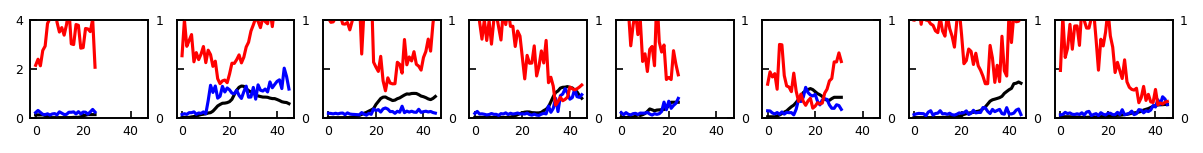

In [33]:
from mutant_datasets import *
from train_myosin_translation import MaskedVAE
from utils.plot_utils import *

model = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('../../tb_logs/May2024/MaskedVAE_sqh_beta=0.0001_split=embryo')
model.load_state_dict(info['state_dict'])
model.to(device)


dataset = TollDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1).mean(axis=(1,2)), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

100%|██████████| 4/4 [00:00<00:00, 284.47it/s]


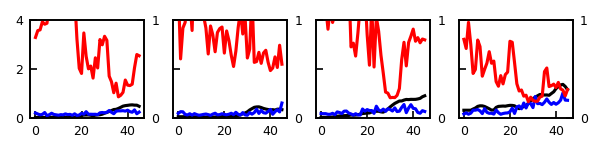

In [32]:
from mutant_datasets import *
from train_myosin_translation import MaskedVAE
from utils.plot_utils import *

model = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('../../tb_logs/May2024/MaskedVAE_sqh_beta=0.0001_split=embryo')
model.load_state_dict(info['state_dict'])
model.to(device)


dataset = SpaetzleDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1).mean(axis=(1,2)), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()